In [4]:
# Step 0. Run the necessary imports.
import cv2
import dlib
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

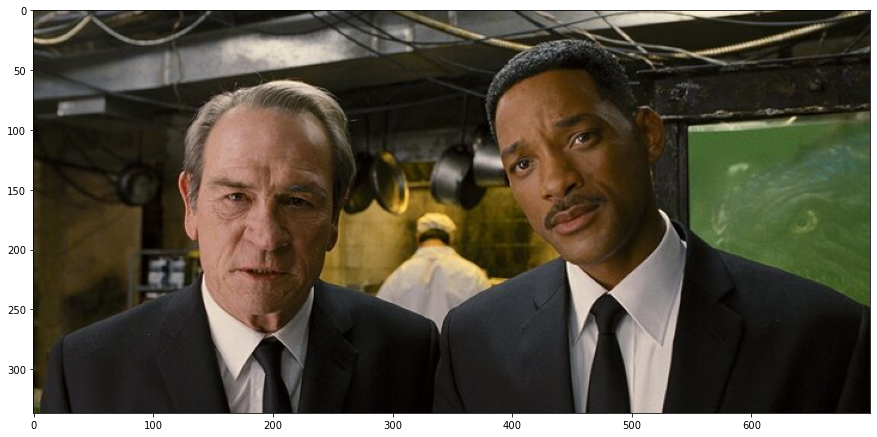

In [11]:
# Step 1. Load an image with faces.
img = cv2.imread('../Data/faces.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [5]:
# Step 2. Load the dlib face predictor.
detector = dlib.get_frontal_face_detector()

In [59]:
# Step 3. Run the predictor on your image.
# 1 --> upsampling factor
def detect_faces(img, upsampling_factor=1):
    rects = detector(img, upsampling_factor)

    print('Number of detected faces:', len(rects))
    print(rects)
    #print(rects[0].left)
    
    return rects

rects = detect_faces(img)

Number of detected faces: 2
rectangles[[(382, 82) (511, 211)], [(124, 125) (253, 254)]]


382 82 129 129
124 125 129 129


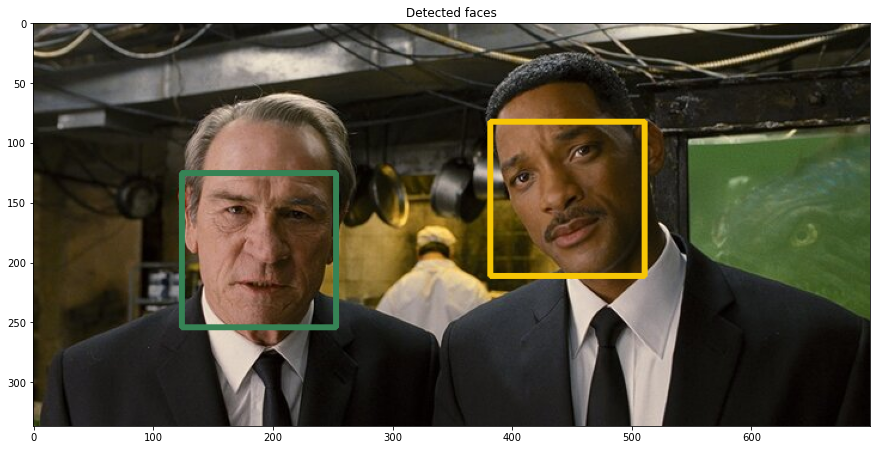

In [60]:
# Step 4. Draw bounding boxes around the detected faces and plot the image. Use different colour for each face.
def rect_to_bb(rect):
    # Dlib rect --> OpenCV rect
    x = rect.left()
    y = rect.top()
    w = rect.right() - x
    h = rect.bottom() - y

    return (x, y, w, h)


def highlight_faces_on_image(img, rects):
    result_dlib = np.copy(img)
    faces_dlib_img = []
    for rect in rects:    
        # Draw rectangle around the face
        x, y, w, h = rect_to_bb(rect)
        print(x, y, w, h)
        color = (np.random.randint(256), np.random.randint(256), np.random.randint(256))
        cv2.rectangle(result_dlib, (x, y), (x+w, y+h), color, 3)
        faces_dlib_img.append(img[y:y+h, x:x+w, :])
    
    plt.subplot(111), plt.imshow(result_dlib), plt.title('Detected faces')

# Draw rectangle around each face
highlight_faces_on_image(img, rects)

Number of detected faces: 8
rectangles[[(215, 56) (305, 146)], [(211, 235) (318, 343)], [(603, 46) (693, 136)], [(382, 239) (511, 368)], [(557, 235) (665, 343)], [(55, 56) (163, 163)], [(66, 245) (155, 335)], [(368, 24) (497, 153)]]
215 56 90 90
211 235 107 108
603 46 90 90
382 239 129 129
557 235 108 108
55 56 108 107
66 245 89 90
368 24 129 129


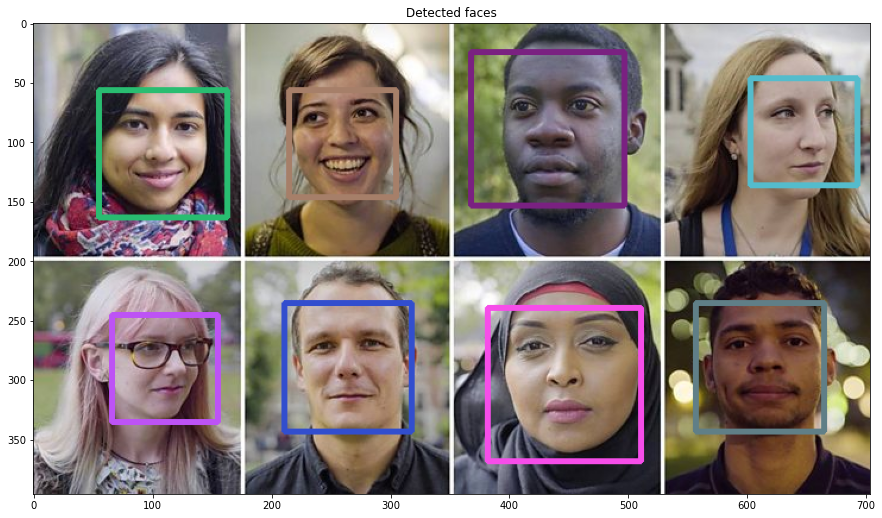

In [57]:
#vStep 5 (optional). Repeat the process with a different and more challenging image
# (more faces, smaller faces, people with glasses, hats, helmets, etc.).
# How does the detector perform? Is it robust?

img2 = cv2.imread('../Data/faces2.jpg')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
rects2 = detect_faces(img2)
highlight_faces_on_image(img2, rects2)

Number of detected faces: 73
rectangles[[(1476, 412) (1538, 474)], [(136, 358) (180, 401)], [(992, 619) (1054, 681)], [(1227, 440) (1289, 502)], [(474, 516) (536, 578)], [(789, 266) (832, 310)], [(1394, 319) (1437, 362)], [(669, 252) (712, 295)], [(1109, 258) (1145, 294)], [(1771, 372) (1823, 424)], [(771, 370) (833, 433)], [(1195, 320) (1247, 372)], [(726, 602) (801, 677)], [(154, 553) (229, 627)], [(1327, 395) (1379, 447)], [(1315, 511) (1390, 586)], [(1828, 495) (1891, 557)], [(1621, 395) (1673, 447)], [(1141, 202) (1177, 238)], [(183, 405) (246, 467)], [(819, 543) (881, 605)], [(294, 315) (356, 377)], [(1061, 523) (1123, 585)], [(941, 274) (977, 310)], [(568, 319) (612, 362)], [(494, 652) (569, 727)], [(988, 389) (1039, 441)], [(1298, 290) (1341, 334)], [(1831, 319) (1874, 362)], [(1637, 266) (1673, 302)], [(1130, 398) (1192, 460)], [(302, 470) (354, 522)], [(1621, 619) (1683, 681)], [(892, 428) (967, 503)], [(225, 290) (261, 326)], [(1531, 536) (1593, 599)], [(1041, 190) (1077, 22

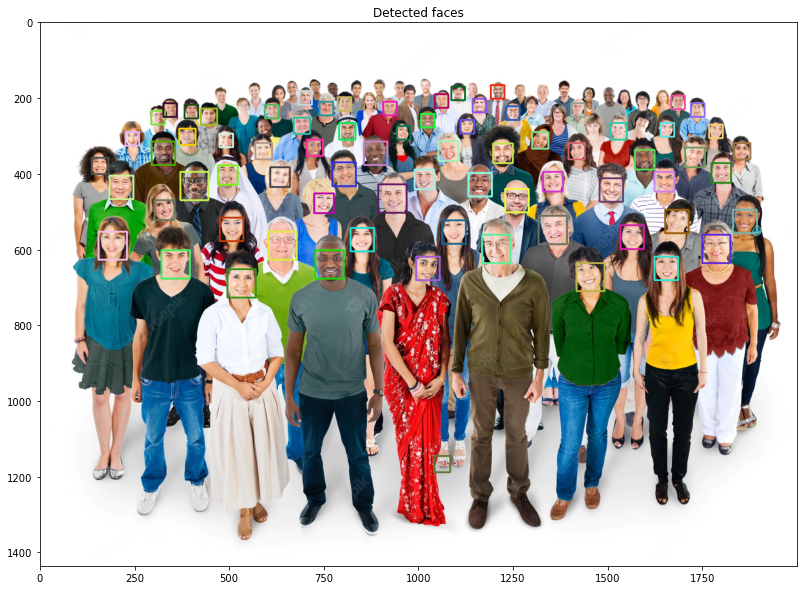

In [63]:
img3 = cv2.imread('../Data/faces3.jpg')
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
rects3 = detect_faces(img3, 1)
highlight_faces_on_image(img3, rects3)

Number of detected faces: 0
rectangles[]


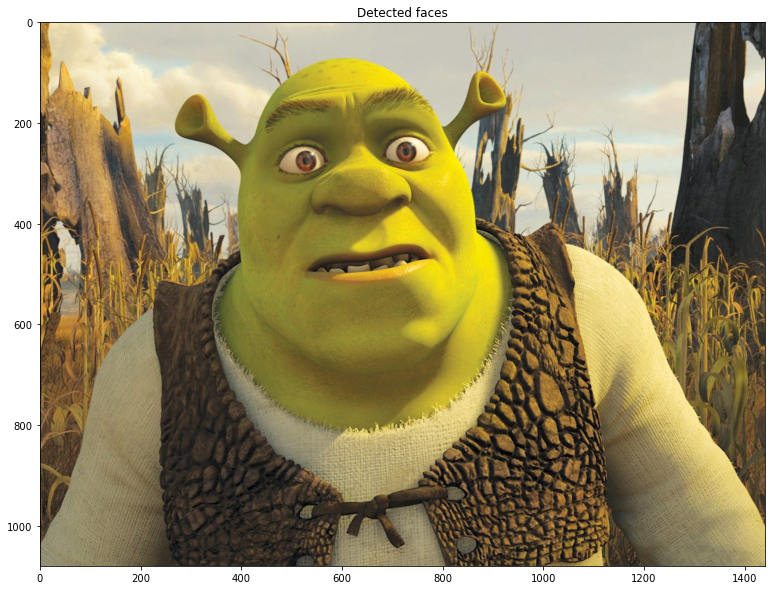

In [64]:
img4 = cv2.imread('../Data/shrek.jpg')
img4 = cv2.cvtColor(img4, cv2.COLOR_BGR2RGB)
rects4 = detect_faces(img4, 1)
highlight_faces_on_image(img4, rects4)

Number of detected faces: 2
rectangles[[(953, 498) (989, 534)], [(41, 302) (77, 338)]]
953 498 36 36
41 302 36 36


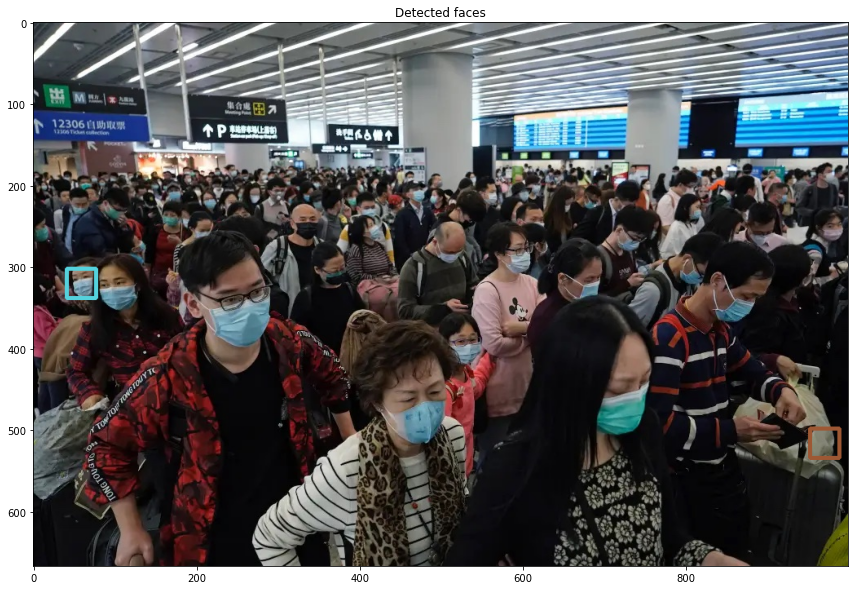

In [71]:
img5 = cv2.imread('../Data/mask.jpg')
img5_ = cv2.cvtColor(img5, cv2.COLOR_BGR2RGB)
rects5 = detect_faces(img5, 1)
highlight_faces_on_image(img5_, rects5)

Number of detected faces: 1
rectangles[[(96, 38) (171, 113)]]
96 38 75 75


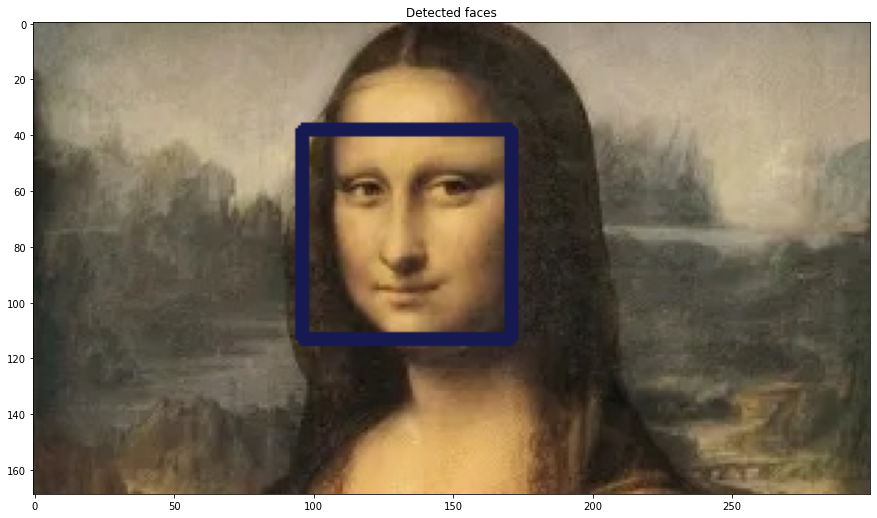

In [72]:
img6 = cv2.imread('../Data/lisa.jpg')
img6 = cv2.cvtColor(img6, cv2.COLOR_BGR2RGB)
rects6 = detect_faces(img6, 1)
highlight_faces_on_image(img6, rects6)

Number of detected faces: 0
rectangles[]


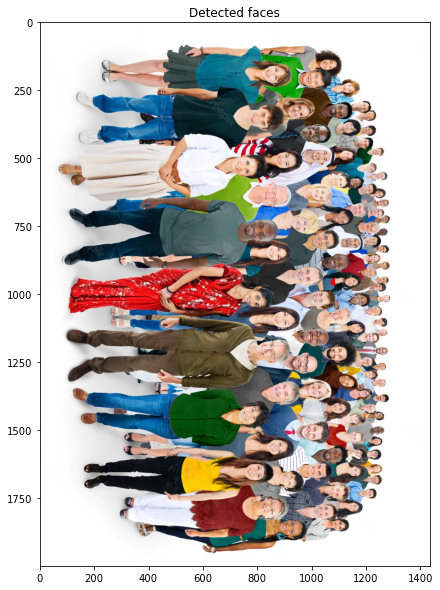

In [76]:
img7 = cv2.rotate(img3, cv2.ROTATE_90_CLOCKWISE) #cv2.ROTATE_180
rects7 = detect_faces(img7, 1)
highlight_faces_on_image(img7, rects7)